In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
import nolds as ns
import numba
from numba import njit
from numba.typed import List
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from progressbar import ProgressBar
sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto.kuramoto import *
from kuramoto.plotting import *
from kuramoto.plotting_dm import *
from kuramoto.network_dm import *
from kuramoto.kuramoto_com import *

In [2]:
# Parameters
dt = 0.01 # time step
t_max = 50 # max time of the simulation
n_steps = int(t_max/dt)
A = 1
B = 2 # B = [1,4,6,8] for B = 1 the field is slowly positively divergent, con l'aumentare di B diminuisce il valore medio del campo
# First network
N1 = 1000 # number of nodes
c1 = 0.2 # coupling between oscillators (will be normalized by the number of interactions)
omega_f = 1 # frequence of the external field


# Second network
N2 = 1000
c2 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]


# Creation of the graphs
# graph_nx1 = nx.complete_graph(N1)
# graph_nx2 = nx.complete_graph(N2)
graph_nx1 = nx.erdos_renyi_graph(n = N1, p = 6/(N1-1), directed = False); title1 = 'ER'
graph_nx2 = nx.erdos_renyi_graph(n = N2, p = 6/(N2-1), directed = False); title2 = 'ER'

#graph_nx1 = nx.barabasi_albert_graph(N1, m = 3); title1 = 'BA'
#graph_nx2 = nx.barabasi_albert_graph(N2, m = 3); title2 = 'BA'

graph1 = nx.to_numpy_array(graph_nx1)
graph2 = nx.to_numpy_array(graph_nx2)
model_1 = Kuramoto_com(coupling1=c1, coupling2 = c2[0], dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B)
model_2 = Kuramoto_com(coupling1=c1, coupling2 = c2[1], dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B)
model_3 = Kuramoto_com(coupling1=c1, coupling2 = c2[2], dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B)
model_4 = Kuramoto_com(coupling1=c1, coupling2 = c2[3], dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B)
model_5 = Kuramoto_com(coupling1=c1, coupling2 = c2[4], dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B)
model_6 = Kuramoto_com(coupling1=c1, coupling2 = c2[5], dt=dt, t_max=t_max, n_nodes1=len(graph1),
                     n_nodes2=len(graph2), omega_f = omega_f, A = A, B = B)

In [3]:
print(f'Initial parameters \n')
print(f'number of nodes: N1 = {N1}, N2 = {N2}')
print(f'coupling: c1 = {c1}, c2 = {c2}')
print(f'A = {A}')
print(f'B = {B}')
print(f'external frequency = {omega_f}')
print(f'time step dt = {dt}')
print(f'number of temporal steps {n_steps}')
act_mat_1 = model_1.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1_1 = [Kuramoto.phase_coherence(vec) for vec in act_mat_1[:N1].T]
ord2_1 = [Kuramoto.phase_coherence(vec) for vec in act_mat_1[N1:N1+N2].T]
print(f'End of the first run')
act_mat_2 = model_2.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1_2 = [Kuramoto.phase_coherence(vec) for vec in act_mat_2[:N1].T]
ord2_2 = [Kuramoto.phase_coherence(vec) for vec in act_mat_2[N1:N1+N2].T]
print(f'End of the second run')
act_mat_3 = model_3.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1_3 = [Kuramoto.phase_coherence(vec) for vec in act_mat_3[:N1].T]
ord2_3 = [Kuramoto.phase_coherence(vec) for vec in act_mat_3[N1:N1+N2].T]
print(f'End of the third run')
act_mat_4 = model_4.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1_4 = [Kuramoto.phase_coherence(vec) for vec in act_mat_4[:N1].T]
ord2_4 = [Kuramoto.phase_coherence(vec) for vec in act_mat_4[N1:N1+N2].T]
print(f'End of the fourth run')
act_mat_5 = model_5.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1_5 = [Kuramoto.phase_coherence(vec) for vec in act_mat_5[:N1].T]
ord2_5 = [Kuramoto.phase_coherence(vec) for vec in act_mat_5[N1:N1+N2].T]
print(f'End of the fifth run')
act_mat_6 = model_6.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1_6 = [Kuramoto.phase_coherence(vec) for vec in act_mat_6[:N1].T]
ord2_6 = [Kuramoto.phase_coherence(vec) for vec in act_mat_6[N1:N1+N2].T]

Initial parameters 

number of nodes: N1 = 1000, N2 = 1000
coupling: c1 = 0.2, c2 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
A = 1
B = 2
external frequency = 1
time step dt = 0.01
number of temporal steps 5000
End of the first run
End of the second run
End of the third run
End of the fourth run
End of the fifth run


array([<Axes: xlabel='t', ylabel='b'>,
       <Axes: title={'center': 'First network'}, xlabel='t', ylabel='r'>,
       <Axes: title={'center': 'Second network'}, xlabel='t', ylabel='r'>],
      dtype=object)

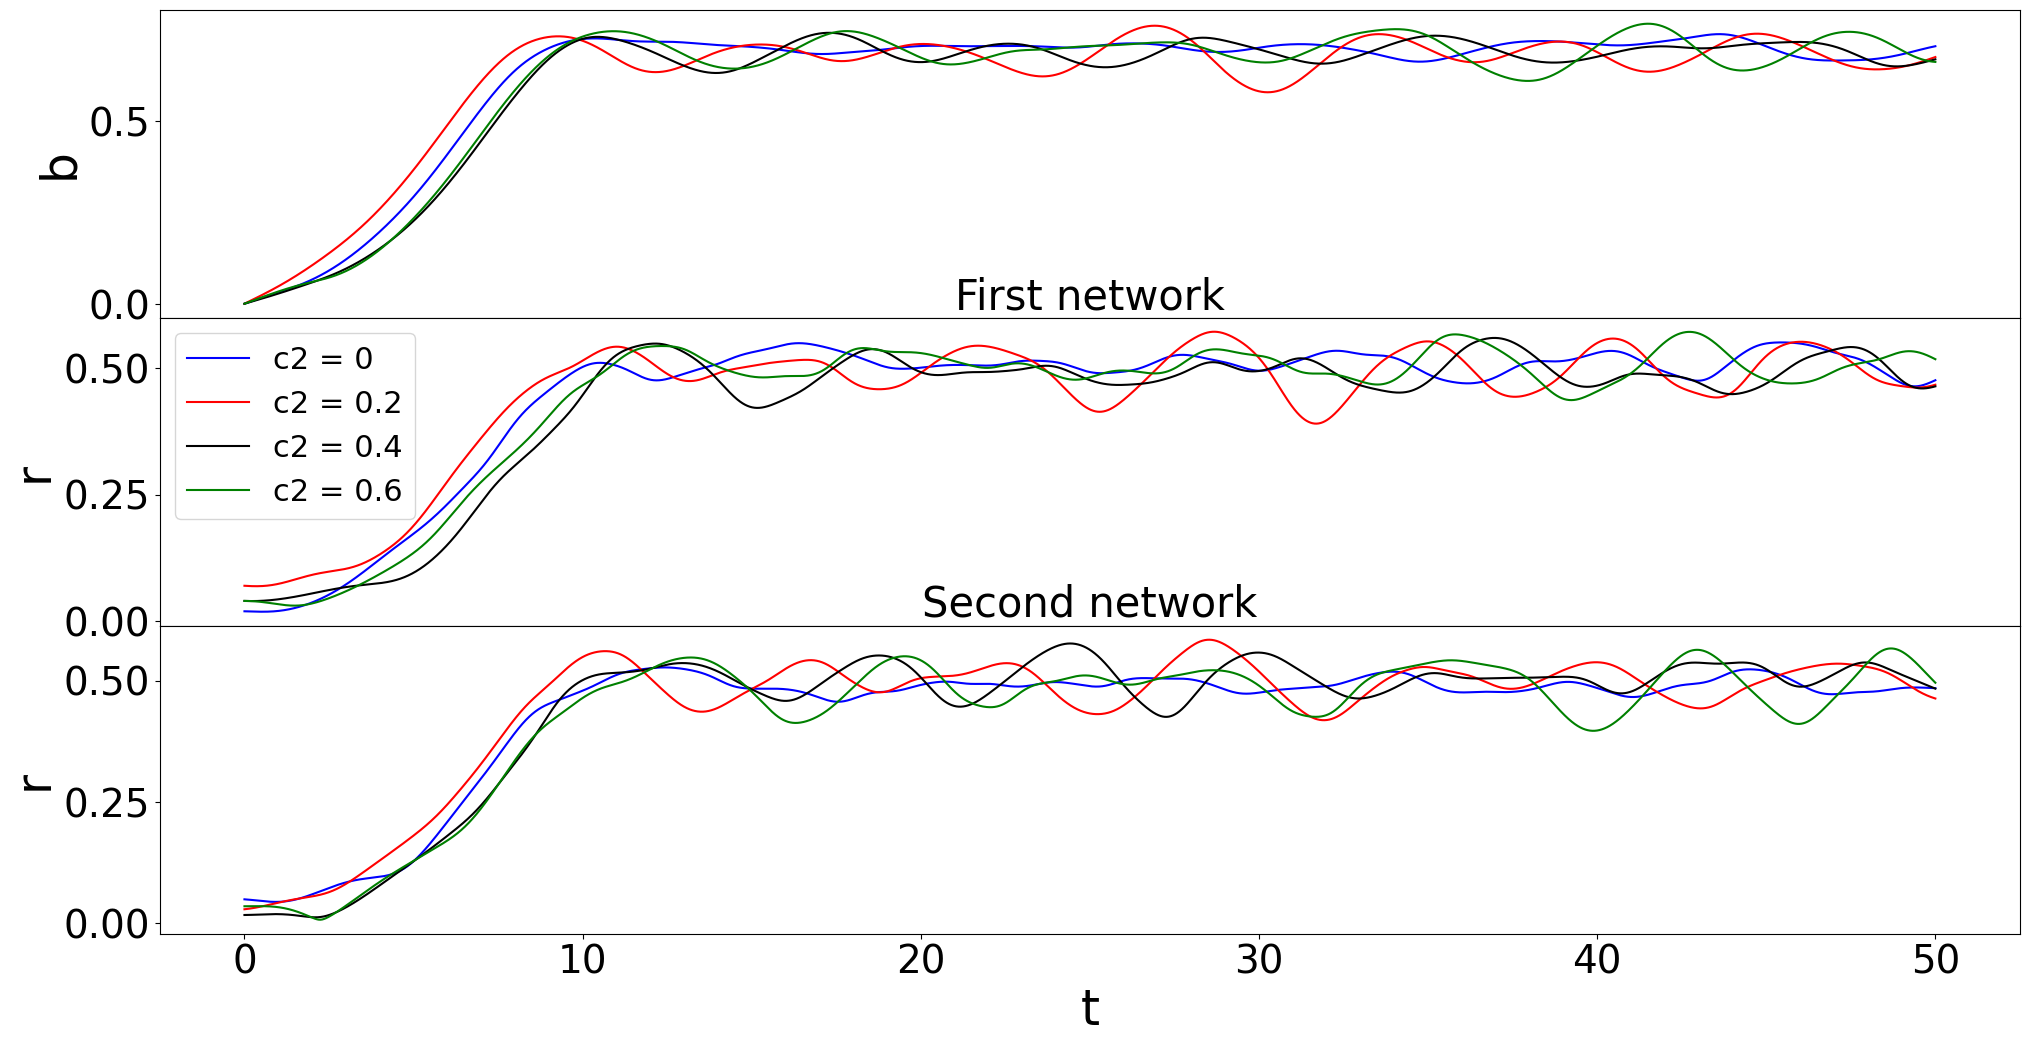

In [4]:
b1 = act_mat_1[-1]
b2 = act_mat_2[-1]
b3 = act_mat_3[-1]
b4 = act_mat_4[-1]
b5 = act_mat_5[-1]
b6 = act_mat_6[-1]

plot_field_order_four(b1, b2, b3, b4, ord1_1, ord1_2, ord1_3, ord1_4, ord2_1, ord2_2, ord2_3, ord2_4, dt, t_max, None, 'c2', c2)
#plot_many_r(ord1_1, ord1_2, ord1_3, ord1_4, dt, t_max, title1, 'c2', c2)
#plot_many_r(ord2_1, ord2_2, ord2_3, ord2_4, dt, t_max, title2, 'c2', c2)

In [5]:
final_state_1 = act_mat_1[:,-1]
final_state_2 = act_mat_2[:,-1]
final_state_3 = act_mat_3[:,-1]
final_state_4 = act_mat_4[:,-1]
final_state_5 = act_mat_5[:,-1]
final_state_6 = act_mat_6[:,-1]

H1_1 = H_J_single1(c1, c2[0], final_state_1[:N1], final_state_1[N1:N1+N2], final_state_1[-1], graph1, graph2, omega_f, A, B, t_max)
H2_1 = H_J_single2(c1, c2[0], final_state_1[:N1], final_state_1[N1:N1+N2], final_state_1[-1], graph1, graph2, omega_f, A, B, t_max)
H12_1 = H_J(c1, c2[0], final_state_1[:N1], final_state_1[N1:N1+N2], final_state_1[-1], graph1, graph2, omega_f, A, B, t_max)

H1_2 = H_J_single1(c1, c2[1], final_state_2[:N1], final_state_2[N1:N1+N2], final_state_2[-1], graph1, graph2, omega_f, A, B, t_max)
H2_2 = H_J_single2(c1, c2[1], final_state_2[:N1], final_state_2[N1:N1+N2], final_state_2[-1], graph1, graph2, omega_f, A, B, t_max)
H12_2 = H_J(c1, c2[1], final_state_2[:N1], final_state_2[N1:N1+N2], final_state_2[-1], graph1, graph2, omega_f, A, B, t_max)

H1_3 = H_J_single1(c1, c2[2], final_state_3[:N1], final_state_3[N1:N1+N2], final_state_3[-1], graph1, graph2, omega_f, A, B, t_max)
H2_3 = H_J_single2(c1, c2[2], final_state_3[:N1], final_state_3[N1:N1+N2], final_state_3[-1], graph1, graph2, omega_f, A, B, t_max)
H12_3 = H_J(c1, c2[2], final_state_3[:N1], final_state_3[N1:N1+N2], final_state_3[-1], graph1, graph2, omega_f, A, B, t_max)

H1_4 = H_J_single1(c1, c2[3], final_state_4[:N1], final_state_4[N1:N1+N2], final_state_4[-1], graph1, graph2, omega_f, A, B, t_max)
H2_4 = H_J_single2(c1, c2[3], final_state_4[:N1], final_state_4[N1:N1+N2], final_state_4[-1], graph1, graph2, omega_f, A, B, t_max)
H12_4 = H_J(c1, c2[3], final_state_4[:N1], final_state_4[N1:N1+N2], final_state_4[-1], graph1, graph2, omega_f, A, B, t_max)

H1_5 = H_J_single1(c1, c2[4], final_state_5[:N1], final_state_5[N1:N1+N2], final_state_5[-1], graph1, graph2, omega_f, A, B, t_max)
H2_5 = H_J_single2(c1, c2[4], final_state_5[:N1], final_state_5[N1:N1+N2], final_state_5[-1], graph1, graph2, omega_f, A, B, t_max)
H12_5 = H_J(c1, c2[4], final_state_5[:N1], final_state_5[N1:N1+N2], final_state_5[-1], graph1, graph2, omega_f, A, B, t_max)

H1_6 = H_J_single1(c1, c2[5], final_state_6[:N1], final_state_6[N1:N1+N2], final_state_6[-1], graph1, graph2, omega_f, A, B, t_max)
H2_6 = H_J_single2(c1, c2[5], final_state_6[:N1], final_state_6[N1:N1+N2], final_state_6[-1], graph1, graph2, omega_f, A, B, t_max)
H12_6 = H_J(c1, c2[5], final_state_6[:N1], final_state_6[N1:N1+N2], final_state_6[-1], graph1, graph2, omega_f, A, B, t_max)

In [15]:
tau_min = 0.0001
tau_max_s = 0.8
tau_max_c = 0.8
tau_points_s = 250
tau_points_c = 500

In [16]:
tau_min1 = tau_min
tau_max_s1 = tau_max_s
tau_points_s1 = tau_points_s
taur_s1 = np.linspace(tau_min1, tau_max_s1, tau_points_s1)

tau_max_c1 = tau_max_c
tau_points_c1 = tau_points_c
taur_c1 = np.linspace(tau_min1, tau_max_c1, tau_points_c1)


S1_1 = []
S2_1 = []
S12_1 = []

C1_1 = []
C2_1 = []
C12_1 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s1):
    S1_1.append(network_thermodynamics_S(H1_1, tau))
    S2_1.append(network_thermodynamics_S(H2_1, tau))
    S12_1.append(network_thermodynamics_S(H12_1, tau))


# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c1):
#     C1_1.append(network_thermodynamics_C(H1_1, tau))
#     C2_1.append(network_thermodynamics_C(H2_1, tau))
#     C12_1.append(network_thermodynamics_C(H12_1, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [17]:
tau_min2 = tau_min
tau_max_s2 = tau_max_s
tau_points_s2 = tau_points_s
taur_s2 = np.linspace(tau_min2, tau_max_s2, tau_points_s2)

tau_max_c2 = tau_max_c
tau_points_c2 = tau_points_c
taur_c2 = np.linspace(tau_min2, tau_max_c2, tau_points_c2)


S1_2 = []
S2_2 = []
S12_2 = []

C1_2 = []
C2_2 = []
C12_2 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s2):
    S1_2.append(network_thermodynamics_S(H1_2, tau))
    S2_2.append(network_thermodynamics_S(H2_2, tau))
    S12_2.append(network_thermodynamics_S(H12_2, tau))


# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c2):
#     C1_2.append(network_thermodynamics_C(H1_2, tau))
#     C2_2.append(network_thermodynamics_C(H2_2, tau))
#     C12_2.append(network_thermodynamics_C(H12_2, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [18]:
tau_min3 = tau_min
tau_max_s3 = tau_max_s
tau_points_s3 = tau_points_s
taur_s3 = np.linspace(tau_min3, tau_max_s3, tau_points_s3)

tau_max_c3 = tau_max_c
tau_points_c3 = tau_points_c
taur_c3 = np.linspace(tau_min3, tau_max_c3, tau_points_c3)


S1_3 = []
S2_3 = []
S12_3 = []

C1_3 = []
C2_3 = []
C12_3 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s3):
    S1_3.append(network_thermodynamics_S(H1_3, tau))
    S2_3.append(network_thermodynamics_S(H2_3, tau))
    S12_3.append(network_thermodynamics_S(H12_3, tau))


# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c3):
#     C1_3.append(network_thermodynamics_C(H1_3, tau))
#     C2_3.append(network_thermodynamics_C(H2_3, tau))
#     C12_3.append(network_thermodynamics_C(H12_3, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [19]:
tau_min4 = tau_min
tau_max_s4 = tau_max_s
tau_points_s4 = tau_points_s
taur_s4 = np.linspace(tau_min4, tau_max_s4, tau_points_s4)

tau_max_c4 = tau_max_c
tau_points_c4 = tau_points_c
taur_c4 = np.linspace(tau_min4, tau_max_c4, tau_points_c4)


S1_4 = []
S2_4 = []
S12_4 = []

C1_4 = []
C2_4 = []
C12_4 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s4):
    S1_4.append(network_thermodynamics_S(H1_4, tau))
    S2_4.append(network_thermodynamics_S(H2_4, tau))
    S12_4.append(network_thermodynamics_S(H12_4, tau))


print(f'Beginning of susceptibility calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_c4):
    C1_4.append(network_thermodynamics_C(H1_4, tau))
    C2_4.append(network_thermodynamics_C(H2_4, tau))
    C12_4.append(network_thermodynamics_C(H12_4, tau))

Beginning of entropy calculation 



100% |########################################################################|


Beginning of susceptibility calculation 



100% |########################################################################|


In [20]:
tau_min5 = tau_min
tau_max_s5 = tau_max_s
tau_points_s5 = tau_points_s
taur_s5 = np.linspace(tau_min5, tau_max_s5, tau_points_s5)

tau_max_c5 = tau_max_c
tau_points_c5 = tau_points_c
taur_c5 = np.linspace(tau_min5, tau_max_c5, tau_points_c5)


S1_5 = []
S2_5 = []
S12_5 = []

C1_5 = []
C2_5 = []
C12_5 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s5):
    S1_5.append(network_thermodynamics_S(H1_5, tau))
    S2_5.append(network_thermodynamics_S(H2_5, tau))
    S12_5.append(network_thermodynamics_S(H12_5, tau))


# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c5):
#     C1_5.append(network_thermodynamics_C(H1_5, tau))
#     C2_5.append(network_thermodynamics_C(H2_5, tau))
#     C12_5.append(network_thermodynamics_C(H12_5, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [21]:
tau_min6 = tau_min
tau_max_s6 = tau_max_s
tau_points_s6 = tau_points_s
taur_s6 = np.linspace(tau_min6, tau_max_s6, tau_points_s6)

tau_max_c6 = tau_max_c
tau_points_c6 = tau_points_c
taur_c6 = np.linspace(tau_min6, tau_max_c6, tau_points_c6)


S1_6 = []
S2_6 = []
S12_6 = []

C1_6 = []
C2_6 = []
C12_6 = []

print('Beginning of entropy calculation \n')
pbar = ProgressBar()
for tau in pbar(taur_s6):
    S1_6.append(network_thermodynamics_S(H1_6, tau))
    S2_6.append(network_thermodynamics_S(H2_6, tau))
    S12_6.append(network_thermodynamics_S(H12_6, tau))


# print(f'Beginning of susceptibility calculation \n')
# pbar = ProgressBar()
# for tau in pbar(taur_c6):
#     C1_6.append(network_thermodynamics_C(H1_6, tau))
#     C2_6.append(network_thermodynamics_C(H2_6, tau))
#     C12_6.append(network_thermodynamics_C(H12_6, tau))

Beginning of entropy calculation 



100% |########################################################################|


In [13]:
# C_12 = []
# C_12.append(C12_1); C_12.append(C12_2);C_12.append(C12_3); C_12.append(C12_4);C_12.append(C12_5); C_12.append(C12_6)
# tau_max = []
# for i in range(len(C_12)):
#     tau_max.append(taur_c4[C_12[i].index(max(C_12[i]))])
# print(tau_max)

<Axes: xlabel='$\\tau$', ylabel='S'>

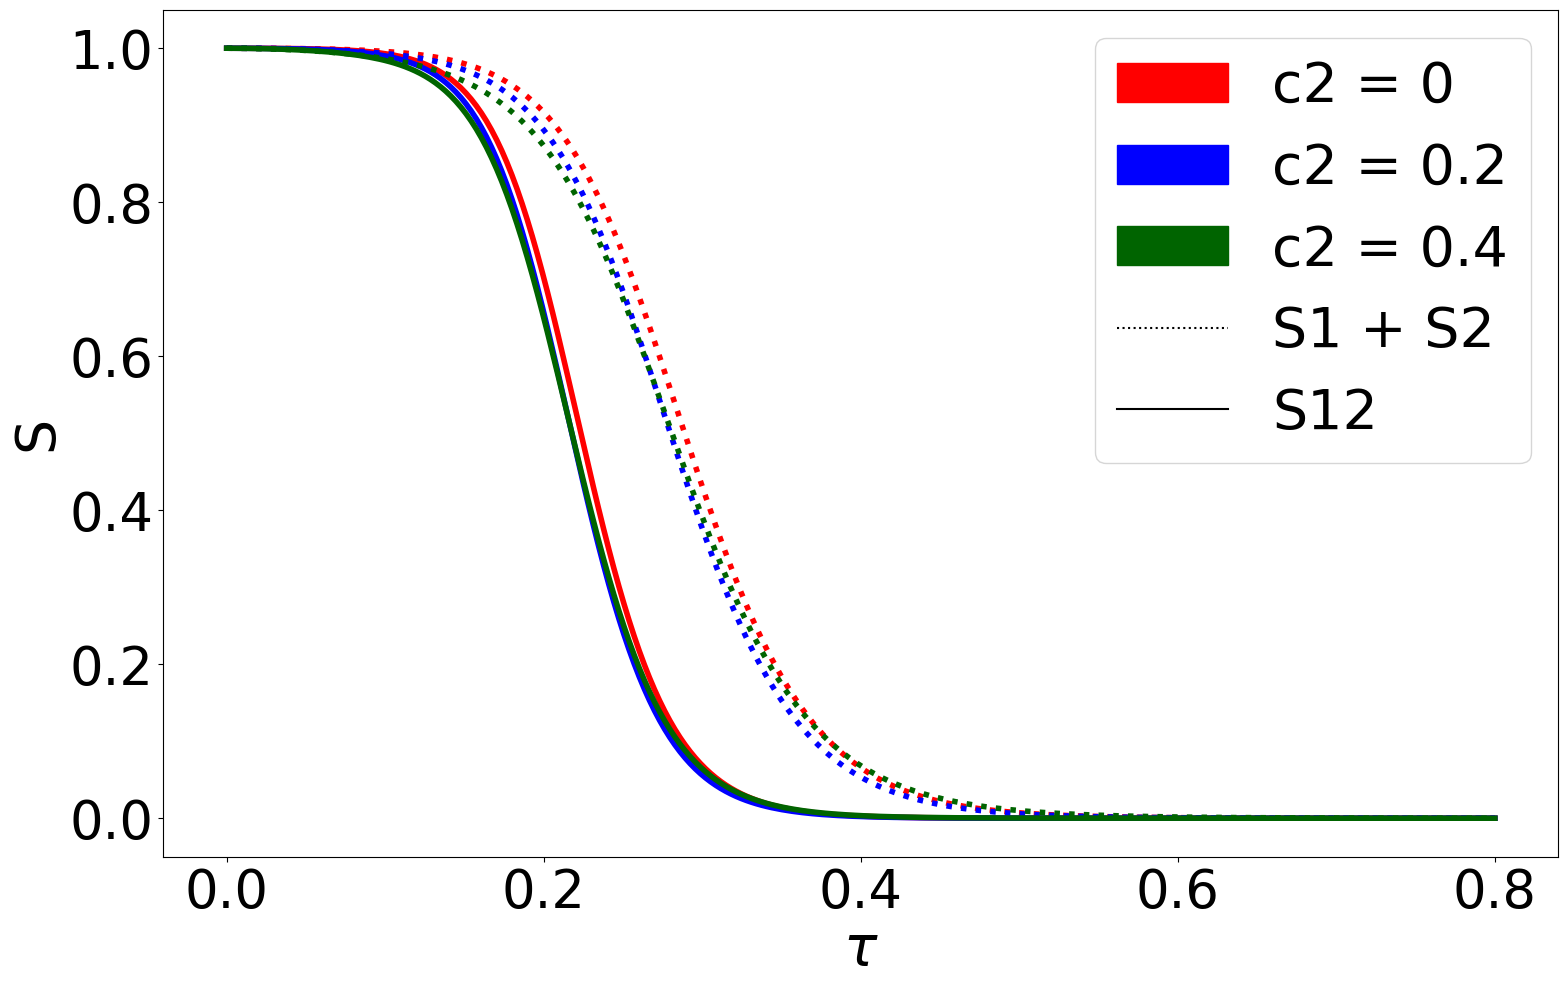

In [26]:
#plot_S(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, S1_4, S2_4, S12_4, c2, f'{title1}-{title2}', 'c2')
plot_S_n(taur_s1, taur_s2, taur_s3, S1_1, S2_1, S12_1, S1_3, S2_3, S12_3, S1_5, S2_5, S12_5, c2, None, 'c2', 'lol')
#plot_entropy(taur_s1, taur_s2, taur_s3, S1_1, S2_1, S12_1, S1_3, S2_3, S12_3, S1_5, S2_5, S12_5, c2, f'{title1}-{title2}', 'c2', 'lol')
# plot_C_n(taur_c1, taur_c2, taur_c3, taur_c4, C1_1, C2_1, C12_1, C1_2, C2_2, C12_2, C1_3, C2_3, C12_3, C1_4, C2_4, C12_4, c2, f'{title1}-{title2}', 'c2')
# plot_S_n_inset(taur_s1, taur_s2, taur_s3, taur_s4, S1_1, S2_1, S12_1, S1_2, S2_2, S12_2, S1_3, S2_3, S12_3, S1_4, S2_4, S12_4, c2, f'{title1}-{title2}', 'c2', 'lol',
#                ord2_1, ord2_2, ord2_3, ord2_4, dt, t_max, None, 'c2', c2)